In [1]:
import pandas as pd
import prophet as Prophet
from app import db, DTSchool

Importing plotly failed. Interactive plots will not work.
C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\flask_sqlalchemy\__init__.py:872: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  warnings.warn(FSADeprecationWarning(


In [18]:
course = 'Bachelor of Science in Accountancy'
tuition_fee = '41000 - 60000'
location = 'Brgy. III'

be_course = {
    'Bachelor of Science in Accountancy': 'hd-accountancy.csv'
}

school_data = pd.read_sql_query(db.session.query(DTSchool).filter(
    (DTSchool.Course == course) & (DTSchool.Tuition_Fee == tuition_fee) | (DTSchool.Location == location)
).statement, db.session.bind)

# Convert the integer labels back into the original string labels
recommended_schools = school_data['School'].tolist()
recommended_schools

["Calamba Doctor's College",
 'Colegio de San Juan de Letran',
 'Laguna College Of Business And Arts',
 'Lyceum of the Philippines University',
 'University of Perpetual Help System Dalta']

In [19]:
df = pd.read_csv(be_course[course])

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

df

,Time Date,School,Course,Passing Rate,Year,Month,Day,ds
0,31122010,AMA Computer College,Bachelor of Science in Accountancy,18.75,2010,12,31,2010-12-31
1,30122011,AMA Computer College,Bachelor of Science in Accountancy,50.00,2011,12,30,2011-12-30
2,31122011,AMA Computer College,Bachelor of Science in Accountancy,19.05,2011,12,31,2011-12-31
3,30122012,AMA Computer College,Bachelor of Science in Accountancy,0.00,2012,12,30,2012-12-30
4,31122012,AMA Computer College,Bachelor of Science in Accountancy,24.32,2012,12,31,2012-12-31
...,...,...,...,...,...,...,...,...
139,31122018,Saint John Colleges,Bachelor of Science in Accountancy,4.17,2018,12,31,2018-12-31
140,30122019,Saint John Colleges,Bachelor of Science in Accountancy,10.53,2019,12,30,2019-12-30
141,31122019,Saint John Colleges,Bachelor of Science in Accountancy,8.57,2019,12,31,2019-12-31
142,31122021,Saint John Colleges,Bachelor of Science in Accountancy,0.00,2021,12,31,2021-12-31


In [29]:
df = pd.read_csv('hd-accountancy.csv')

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

Schools = ["Calamba Doctor's College",
 'Colegio de San Juan de Letran',
 'Laguna College Of Business And Arts',
 'Lyceum of the Philippines University',
 'University of Perpetual Help System Dalta']
for school in recommended_schools:
    df_school = df[df['School'] == school]
    df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
    df_school.columns = ['y', 'ds']

    m = Prophet.Prophet(interval_width=0.95)
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
    _model = m.fit(df_school)

    # Get the latest date in the original data frame
    latest_date = df_school['ds'].max()

    # Get the range of dates for the future data frame
    start_date = latest_date - pd.DateOffset(years=5)
    end_date = latest_date + pd.DateOffset(years=5)
    future_dates = pd.date_range(start_date, end_date, freq='Y')

    # Create the future data frame
    _future = pd.DataFrame({'ds': future_dates})

    # Get predictions for those specific dates
    _forecast = m.predict(_future)
    _forecast['yhat'] = _forecast['yhat'].clip(lower=0, upper=100).round()
    yhat_values = _forecast['yhat'].tolist()


C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\77829973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
19:09:37 - cmdstanpy - INFO - Chain [1] start processing
19:09:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wowha\AppData\Local\Temp\ipykernel_14268\77829973.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
19:09:38 - cmdstanpy - INFO - Chain [1] start processing
19:09:38 - cmdstanpy - INFO - Chain [1] 

In [2]:
course = 'Bachelor of Science in Accountancy'
tuition_fee = '41000 - 60000'
location = 'Laguna'
be_course = {
    'Bachelor of Science in Accountancy': 'hd-accountancy.csv'
}

school_data = pd.read_sql_query(db.session.query(DTSchool).filter(
    (DTSchool.Course == course) & (DTSchool.Tuition_Fee == tuition_fee) & (DTSchool.Location == location)
).statement, db.session.bind)
schools = school_data['School']

df = pd.read_csv(be_course[course])

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
all_yhat_values = []
for school in schools:
    df_school = df[df['School'] == school]
    df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
    df_school.columns = ['y', 'ds']

    m = Prophet.Prophet(interval_width=0.95)
    m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    m.add_seasonality(name='semi-annual', period=365.25 / 2, fourier_order=10)
    _model = m.fit(df_school)

    # Get the latest date in the original data frame
    latest_date = df_school['ds'].max()

    # Get the range of dates for the future data frame
    start_date = latest_date - pd.DateOffset(years=5)
    end_date = latest_date + pd.DateOffset(years=5)
    future_dates = pd.date_range(start_date, end_date, freq='Y')

    # Create the future data frame
    _future = pd.DataFrame({'ds': future_dates})

    # Get predictions for those specific dates
    _forecast = m.predict(_future)
    _forecast['yhat'] = _forecast['yhat'].clip(lower=0, upper=100).round()
    yhat_values = _forecast['yhat'].tolist()
    all_yhat_values.append(yhat_values)

C:\Users\wowha\AppData\Local\Temp\ipykernel_11500\3456732180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
22:35:28 - cmdstanpy - INFO - Chain [1] start processing
22:35:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wowha\AppData\Local\Temp\ipykernel_11500\3456732180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
22:35:30 - cmdstanpy - INFO - Chain [1] start processing
22:35:30 - cmdstanpy - INFO - Chain 

In [3]:
school_profiles = []
for i, school in enumerate(schools):
    school_profile = DTSchool.query.filter_by(School=school).first()
    if school_profile:
        school_profiles.append({
            'School': school_profile.School,
            'Tuition_Fee': school_profile.Tuition_Fee,
            'yhat_values': all_yhat_values[i]
        })

In [4]:
school_profiles

[{'School': "Calamba Doctor's College",
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [11.0, 21.0, 0.0, 0.0, 5.0, 0.0, 1.0, 14.0, 5.0, 12.0, 0.0]},
 {'School': 'Colegio de San Juan de Letran',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [24.0, 15.0, 4.0, 3.0, 8.0, 19.0, 9.0, 0.0, 0.0, 0.0, 0.0]},
 {'School': 'Laguna College Of Business And Arts',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [6.0, 9.0, 11.0, 8.0, 5.0, 14.0, 4.0, 3.0, 0.0, 5.0, 2.0]},
 {'School': 'Lyceum of the Philippines University',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [49.0,
   40.0,
   31.0,
   13.0,
   35.0,
   37.0,
   27.0,
   17.0,
   21.0,
   0.0,
   12.0]},
 {'School': 'University of Perpetual Help System Dalta',
  'Tuition_Fee': '41000 - 60000',
  'yhat_values': [43.0, 5.0, 9.0, 7.0, 0.0, 0.0, 49.0, 0.0, 0.0, 15.0, 3.0]}]

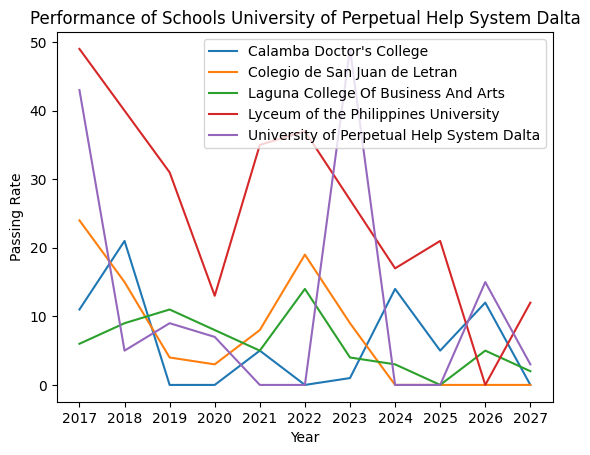

In [9]:
import matplotlib.pyplot as plt

for profile in school_profiles:
    school = profile['School']
    yhat_values = profile['yhat_values']

    # create the x-axis values
    years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
    x = range(len(years))

    # plot the line chart
    plt.plot(x, yhat_values, label=school)
    plt.xticks(x, years)
    plt.xlabel('Year')
    plt.ylabel('Passing Rate')
    # plt.title('Performance of Schools {}'.format(school))
    plt.legend()

# show the plot
plt.show()

In [4]:
import pandas as pd

# read test.csv into a pandas dataframe
test = pd.read_csv('Historical Data/hd-Accountancy.csv', header=0, encoding='windows-1252')

# # rename the columns in test dataframe
# test.columns = ['School', 'Passing Rate']
# test['School'] = test['School'].str.replace('\n', ' ')
# test['Passing Rate'] = test['Passing Rate'].str.replace('%', '')
test

,Time Date,School,Course,Passing Rate
0,31122010,City College of Calamba,Bachelor of Science in Accountancy,18.75
1,30122011,City College of Calamba,Bachelor of Science in Accountancy,50.00
2,31122011,City College of Calamba,Bachelor of Science in Accountancy,19.05
3,30122012,City College of Calamba,Bachelor of Science in Accountancy,0.00
4,31122012,City College of Calamba,Bachelor of Science in Accountancy,24.32
...,...,...,...,...
1256,30122011,WEST BAY COLLEGE,Bachelor of Science in Accountancy,0.00
1257,30122011,WEST NEGROS COLLEGE,Bachelor of Science in Accountancy,20.00
1258,30122011,WESTERN INSTITUTE OF TECHNOLOGY,Bachelor of Science in Accountancy,37.50
1259,30122011,WESTERN LEYTE COLLEGE ORMOC,Bachelor of Science in Accountancy,40.00


In [6]:
test = test.sort_values(by='School', ascending=True)
test

,Time Date,School,Course,Passing Rate
501,31122010,ABE INTERNATIONAL COLLEGE OF BUSINESS & ECONOM...,Bachelor of Science in Accountancy,0.0
144,30122010,ABE INTERNATIONAL COLLEGE OF BUSINESS & ECONOM...,Bachelor of Science in Accountancy,50.0
502,31122010,ABE INTERNATIONAL COLLEGE OF BUSINESS & ECONOM...,Bachelor of Science in Accountancy,0.0
145,30122010,ABE INTERNATIONAL COLLEGE OF BUSINESS & ECONOM...,Bachelor of Science in Accountancy,0.0
891,30122011,ABE INTERNATIONAL COLLEGE OF BUSINESS & ECONOM...,Bachelor of Science in Accountancy,100.0
...,...,...,...,...
889,31122010,XAVIER UNIVERSITY,Bachelor of Science in Accountancy,82.5
499,30122010,XAVIER UNIVERSITY,Bachelor of Science in Accountancy,82.0
1260,30122011,XAVIER UNIVERSITY,Bachelor of Science in Accountancy,50.0
500,30122010,ZAMBOANGA DEL SUR MARITIME INSTITUTE OF TECHNO...,Bachelor of Science in Accountancy,100.0
